In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [16]:
# Sample Data Creation
data = pd.read_csv('../../../0.Databases/Fish-Market-dataset/Fish.csv')

# Create a DataFrame
df = pd.DataFrame(data)
# df = df.head(10)
# Select rows from index 50 to 70 (51st to 71st row)
df = df.iloc[50:65]
df

,Species,Weight,Length1,Length2,Length3,Height,Width
50,Roach,200.0,22.1,23.5,26.8,7.3968,4.1272
51,Roach,180.0,23.6,25.2,27.9,7.0866,3.9060
52,Roach,290.0,24.0,26.0,29.2,8.8768,4.4968
53,Roach,272.0,25.0,27.0,30.6,8.5680,4.7736
54,Roach,390.0,29.5,31.7,35.0,9.4850,5.3550
55,Whitefish,270.0,23.6,26.0,28.7,8.3804,4.2476
56,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
57,Whitefish,306.0,25.6,28.0,30.8,8.7780,4.6816
58,Whitefish,540.0,28.5,31.0,34.0,10.7440,6.5620
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736


In [18]:
# Split the data into features and target variable

df_encoded = pd.get_dummies(df, columns=["Species"], drop_first=True)

# X = df[['Weight', 'Freshness']]
X = df_encoded.drop("Weight", axis=1)

# y = df['Price']
y = df_encoded["Weight"]
df_encoded

,Weight,Length1,Length2,Length3,Height,Width,Species_Roach,Species_Whitefish
50,200.0,22.1,23.5,26.8,7.3968,4.1272,True,False
51,180.0,23.6,25.2,27.9,7.0866,3.9060,True,False
52,290.0,24.0,26.0,29.2,8.8768,4.4968,True,False
53,272.0,25.0,27.0,30.6,8.5680,4.7736,True,False
54,390.0,29.5,31.7,35.0,9.4850,5.3550,True,False
55,270.0,23.6,26.0,28.7,8.3804,4.2476,False,True
56,270.0,24.1,26.5,29.3,8.1454,4.2485,False,True
57,306.0,25.6,28.0,30.8,8.7780,4.6816,False,True
58,540.0,28.5,31.0,34.0,10.7440,6.5620,False,True
59,800.0,33.7,36.4,39.6,11.7612,6.5736,False,True


In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Create and fit the regression tree model
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [21]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([1000.,   90.,  180.])

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 13875.0
R^2 Score: 0.8665936648683297


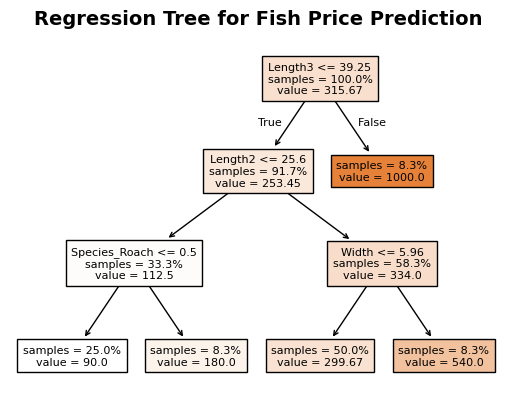

In [33]:
# Visualizing the Tree

# plt.figure(figsize=(15, 9))
plt.figure()  # No figsize specified, matplotlib will adjust automatically
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    # rounded=True,  # Rounded boxes for a smoother look
    precision=2,  # Set decimal precision for values
    fontsize=8,  # Increase font size for readability
    proportion=True,  # Adjust box sizes based on their importance
    impurity=False,  # Hide impurity values to make the tree cleaner
)

# Add title with better formatting
plt.title("Regression Tree for Fish Price Prediction", fontsize=14, fontweight="bold")
plt.show()